## Data Download

## Imports and Setup

In [2]:
import idx2numpy # https://pypi.org/project/idx2numpy/
import numpy as np
np.random.seed(0)
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

from glob import glob

PATH = 'fashion-mnist/data/fashion/'
DICT = {
    0: 't-shirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle boot'
}

## Data preparation

In [3]:
data = {}
for file, label in zip(sorted(glob(PATH+'*')),
                ['test_images', 'test_labels',
                 'train_images', 'train_labels']):
    data[label] = idx2numpy.convert_from_file(file)

## 1. Data exploration

In [4]:
for key, value in data.items():
    print(f'{key} shape: {value.shape}')

test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)


ankle boot


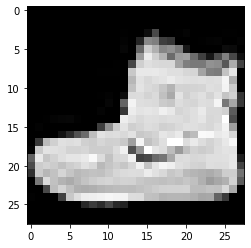

In [5]:
print(DICT[data['train_labels'][0]])
plt.imshow(data['train_images'][0], cmap='gray')
plt.show()

## 3. Data preprocessing

In [6]:
# define training and testing arrays
Xtr = data['train_images']
Ytr = data['train_labels']
Xte = data['test_images']
Yte = data['test_labels']


# preprocessing lambda functions
keys = np.random.permutation(len(Xtr))
shuffle = lambda X, keys: X[keys]
scale = lambda X: (X.astype(np.float32) - 127.5) / 127.5
flat = lambda X: X.reshape(X.shape[0], -1)


# preprocess arrays
Xtr = shuffle(Xtr, keys)
Ytr = shuffle(Ytr, keys)

Xtr = scale(Xtr)
Xte = scale(Xte)

Xtr = flat(Xtr)
Xte = flat(Xte)

t-shirt


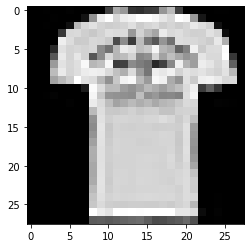

In [7]:
print(DICT[Ytr[0]])
plt.imshow((Xtr[0].reshape(28, 28)), cmap='gray')
plt.show()

## 2. Fully Connected Neural Network

In [8]:
print(f"""
We will use a fully connected neural network with {np.prod(data['train_images'][0].shape)} input neurons and {len(DICT)} output neurons. Classification of an image dataset is a large-enough problem to warrant a neural network; however, we will experiment with different hidden layer sizes and numbers. 
""")


We will use a fully connected neural network with 784 input neurons and 10 output neurons. Classification of an image dataset is a large-enough problem to warrant a neural network; however, we will experiment with different hidden layer sizes and numbers. 



In [9]:
from nn import *

In [10]:
# initialize model
model = Model()

# add layers
model.add(Layer_Dense(Xtr.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 256))
model.add(Activation_ReLU())
model.add(Layer_Dense(256, 10))
# model.add(Activation_ReLU())
# model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

# set model parameters
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical()
)

# finalize model
model.finalize()

# train model
model.train(Xtr, Ytr, validation_data=(Xte, Yte),
            epochs=20, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.109, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.758, loss: 0.650 (data_loss: 0.650, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.789, loss: 0.599 (data_loss: 0.599, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.820, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.836, loss: 0.451 (data_loss: 0.451, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.854, loss: 0.412 (data_loss: 0.412, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.775, loss: 0.616 (data_loss: 0.616, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.831, loss: 0.468
epoch: 2
step: 0, acc: 0.836, loss: 0.420 (data_loss: 0.420, reg_loss: 0.000), lr: 0.0006807351940095304
step: 100, acc: 0.805, loss: 0.473 (data_loss: 0.473, reg_loss: 0.000), lr: 0.0006373486297004461
step: 200, acc: 0.828, loss: 0.485 (data_loss: 0.485, reg_loss: 0.000), lr: 0.000599161

step: 200, acc: 0.891, loss: 0.283 (data_loss: 0.283, reg_loss: 0.000), lr: 0.00015725743041358704
step: 300, acc: 0.906, loss: 0.211 (data_loss: 0.211, reg_loss: 0.000), lr: 0.00015482272797646694
step: 400, acc: 0.914, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.00015246226558926666
step: 468, acc: 0.938, loss: 0.180 (data_loss: 0.180, reg_loss: 0.000), lr: 0.00015089784216085713
training, acc: 0.906, loss: 0.260 (data_loss: 0.260, reg_loss: 0.000), lr: 0.00015089784216085713
validation, acc: 0.878, loss: 0.338
epoch: 13
step: 0, acc: 0.914, loss: 0.193 (data_loss: 0.193, reg_loss: 0.000), lr: 0.00015087507543753772
step: 100, acc: 0.891, loss: 0.301 (data_loss: 0.301, reg_loss: 0.000), lr: 0.00014863258026159336
step: 200, acc: 0.898, loss: 0.276 (data_loss: 0.276, reg_loss: 0.000), lr: 0.00014645577035735208
step: 300, acc: 0.906, loss: 0.207 (data_loss: 0.207, reg_loss: 0.000), lr: 0.0001443418013856813
step: 400, acc: 0.922, loss: 0.242 (data_loss: 0.242, reg_loss: 0.0

## 4. Performance validation

In [11]:
model.evaluate(Xte, Yte)

validation, acc: 0.881, loss: 0.331
